In [19]:
import collections
import inspect
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog
from graphiclog import utils, io, defaults

In [5]:
graphiclog.__file__, dir(graphiclog)

('/home/ross/code/python/projects/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

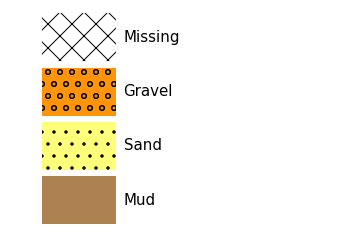

In [6]:
graphiclog.defaults.litholegend.plot()

# Load All Sequences

Here's a function (modified from `depstrat.data`) to load all the sequences as `BedSequence`s: 

In [12]:
# Set up some default args:

FPATH = '../data/AllBedsWithProfiles_CLEAN.csv'

# Columns to convert from strings to arrays
transforms = {c : utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}


# binary indicators
BINARY_FEATURES = ['snd', 'shl']


# bed data columns
FLOAT_FEATURES = [
    'th',
    'gs_tops_psi',
    'mean_gs_psi',
    'max_gs_psi',
    'grain_size_psi',
    'depth_m'
]

FEATURES = BINARY_FEATURES + FLOAT_FEATURES


# Sequence-level metadata
METACOLS = ['name', 'count', 'collection', 'eod', 'eodnum']


# Lithology component map
COMPONENT_MAP = ('mean_gs_psi', lambda gs: defaults.gs2litho(gs, units='psi'))

In [17]:
def load_sequences(
    fpath=FPATH,
    resample=None,
    depth_col='depth_m',
    features=FEATURES,
    metacols=METACOLS,
    min_length=3
):
    """
    Load the dataset from saved csv. Return list of BedSequences.
    """
    df = pd.read_csv(fpath, converters=transforms)

    bed_seqs = []
    for name, grp in df.groupby('count'):
        seq = graphiclog.BedSequence.from_dataframe(
                grp,
                topcol='tops',
                basecol='bases',
                component_map=COMPONENT_MAP,
                datacols=features,
                metacols=metacols
        )
        if len(seq) >= min_length:
            bed_seqs.append(seq)

    # resample arrays if you want
    for seq in bed_seqs:
        if resample is not None:
            seq.resample_data(depth_col, resample)

    return bed_seqs

In [18]:
sequences = load_sequences()

# Check out a sequence

In [25]:
seq = random.choice(sequences)

seq

Striplog(487 Intervals, start=0.0, stop=236.5818)

In [28]:
seq.metadata

{'name': 'Cache Creek',
 'count': 134,
 'collection': 'Great Valley Group',
 'eod': 'fan',
 'eodnum': 1}

In [26]:
# The first bed
seq[0]

Interval({'data': {'snd': 1.0, 'shl': -0.0, 'th': 0.361039999999974, 'gs_tops_psi': -3.0631, 'mean_gs_psi': -3.0631, 'max_gs_psi': -3.0631, 'grain_size_psi': array([-3.0637, -3.0637]), 'depth_m': array([236.5818, 236.2208])}, 'top': Position({'middle': 236.5818, 'units': 'm'}), 'base': Position({'middle': 236.22076, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'sand'})]})

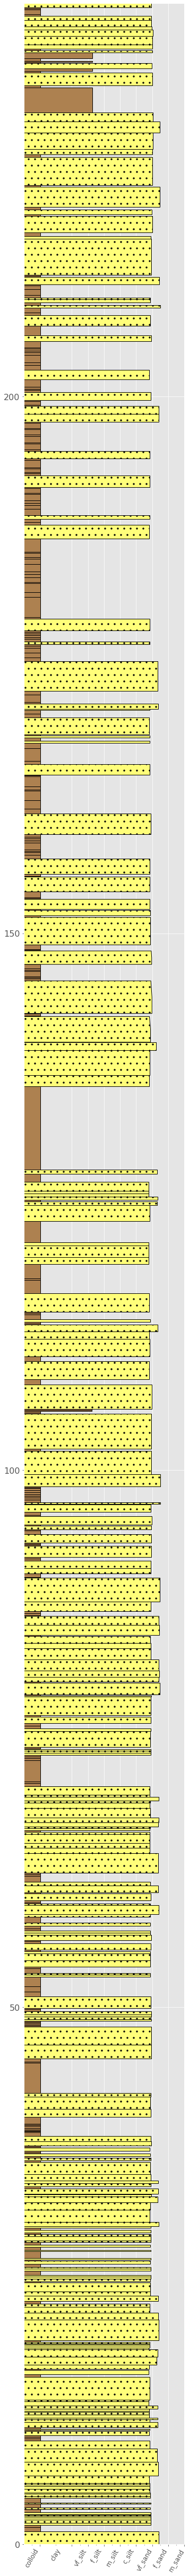

In [27]:
seq.plot(legend=defaults.litholegend, width_field='grain_size_psi', fig_width=7)